# Mapping in Python

In this lecture, we will use a new package, `geopandas`, to create maps.

Maps are really quite complicated... We are trying to project a spherical surface onto a flat figure, which is an inherently complicated endeavor.

Luckily, `geopandas` will do most of the heavy lifting for us.

Let's start with a `DataFrame` that has the latitude and longitude coordinates of various South American cities.

Our goal is to turn them into something we can plot – in this case, a `GeoDataFrame`.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 

from shapely.geometry import Point

df = pd.DataFrame({
    'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
    'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
    'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
    'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]
})

In [2]:
# Add coordinates as tuple, notice it needs to be with first capital "Coordinates"
df["coordinates"] = list(zip(df.Longitude, df.Latitude))
df.head()

,City,Country,Latitude,Longitude,coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


In [3]:
df["coordinates"] = df["coordinates"].apply(Point)
df.head()

,City,Country,Latitude,Longitude,coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


Finally, we will convert our `DataFrame` into a `GeoDataFrame` by calling the `geopandas.DataFrame` method.

Conveniently, a `GeoDataFrame` is a data structure with the convenience of a normal `DataFrame` but also an understanding of how to plot maps.

In the code below, we must specify the column that contains the geometry data.

See this excerpt from the docs

> The most important property of a `GeoDataFrame` is that it always has one `GeoSeries` column that holds a special status. This `GeoSeries` is referred to as the `GeoDataFrame`'s "geometry". When a spatial method is applied to a `GeoDataFrame` (or a spatial attribute like area is called), this commands will always act on the "geometry" column.


In [4]:
# Apply geopandas methods
gdf = gpd.GeoDataFrame(df, geometry="coordinates")
gdf.head()

,City,Country,Latitude,Longitude,coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66000 -34.58000)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91000 -15.78000)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66000 -33.45000)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08000 4.60000)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86000 10.48000)


In [5]:
# Doesn't look different than a vanilla DataFrame...let's make sure we have what we want
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: coordinates


## Plotting a Map

Great, now we have our points in the GeoDataFrame.

Let’s plot the locations on a map.

This will require 3 steps

1. Get the map
1. Plot the map
1. Plot the points (our cities) on the map


### 1. Get the map

An organization called [Natural Earth](https://www.naturalearthdata.com/) compiled the map data that we use here.

The file provides the outlines of countries, over which we'll plot the city locations from our `GeoDataFrame`.

Luckily, `geopandas` already comes bundled with this data, so we don't have to hunt it down!


In [6]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### 2. Plotting the Map

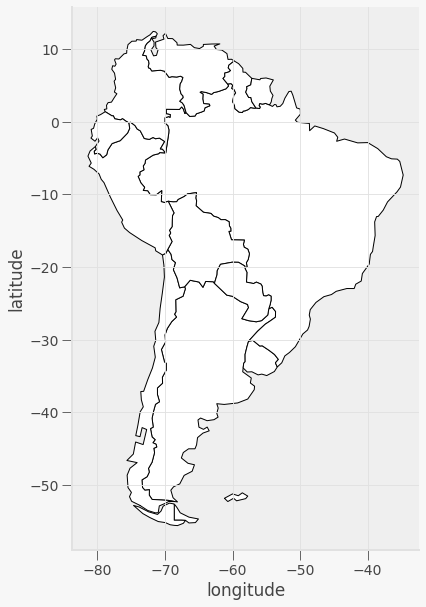

In [7]:
# Import QE Data Science Library for theme
import qeds
qeds.themes.mpl_style()

fig, gax = plt.subplots(figsize=(10, 10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("continent == 'South America'").plot(
    ax=gax, edgecolor='black', color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


## 3. Plot the Cities

Append cities plotted in the map

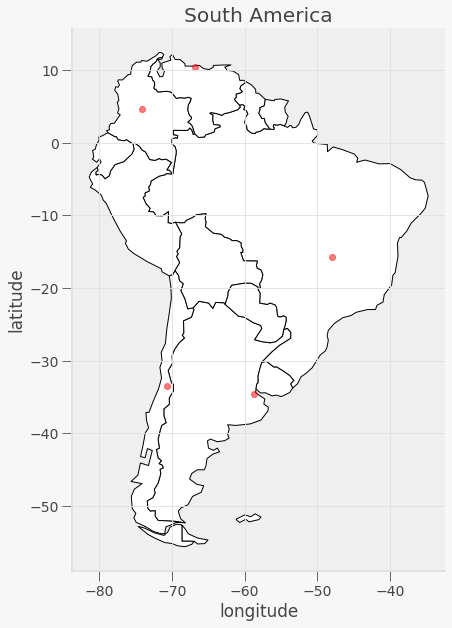

In [8]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10, 10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("continent == 'South America'").plot(
    ax=gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha=0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


**Adding Labels**

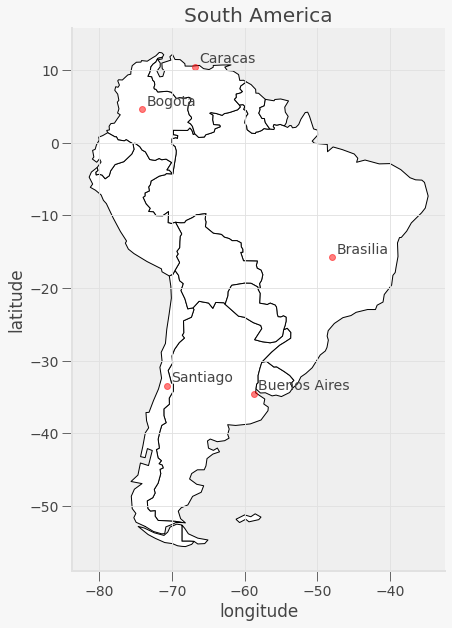

In [9]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(10, 10))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world.query("continent == 'South America'").plot(
    ax=gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha=0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdf['coordinates'].x, gdf['coordinates'].y, gdf['City']):
    gax.annotate(label, xy=(x, y), xytext=(4, 4), textcoords='offset points')

plt.show()
